In [1]:
import pandas as pd
import numpy as np
import os
os.environ['USE_PYGEOS'] = '0'
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as cx

%matplotlib inline

In [2]:
#Read Plot Data
plots = pd.read_csv("./FIAData/ID_PLOT.csv")
plots.head()

,PLOTID,VISIT_NBR,STATECD,UNITCD,COUNTYCD,RETIRED_PLOT,INTENSITY,MEAS_YEAR,MEAS_MONTH,MEAS_DAY,...,PLOT_NONSAMPLE_REASN_CD,MANUAL_NATIONAL,MANUAL_REGIONAL,LAT,LON,ROAD_DIST_CD,WATER_CD,SUBP_EXAMINE_CD,CN,PREV_PLT_CN
0,1114803,1,48,5,453,280,2,2014,6,24,...,NaN,6.0,6.0.1,30.294066,-97.909314,NaN,NaN,1,251082970489998,NaN
1,1114751,1,48,5,453,228,2,2014,5,21,...,NaN,6.0,6.0.1,30.351815,-97.729351,NaN,NaN,1,251082980489998,NaN
2,1114702,1,48,5,453,179,3,2014,10,30,...,NaN,6.0,6.0.1,30.329763,-97.778474,NaN,NaN,1,251083018489998,NaN
3,1114730,1,48,5,453,207,3,2014,7,21,...,NaN,6.0,6.0.1,30.159883,-97.756332,NaN,NaN,1,251083021489998,NaN
4,1114754,1,48,5,453,231,4,2014,7,29,...,NaN,6.0,6.0.1,30.369997,-97.723125,NaN,NaN,1,251083034489998,NaN


In [3]:
geometry = gpd.points_from_xy((plots['LON']).astype(float),(plots['LAT']).astype(float))
geometry

<GeometryArray>
[<POINT (-97.909 30.294)>, <POINT (-97.729 30.352)>,  <POINT (-97.778 30.33)>,
  <POINT (-97.756 30.16)>,  <POINT (-97.723 30.37)>, <POINT (-97.848 30.181)>,
 <POINT (-97.808 30.214)>, <POINT (-97.684 30.406)>,   <POINT (-97.636 30.3)>,
 <POINT (-97.673 30.267)>,
 ...
 <POINT (-95.703 29.895)>, <POINT (-95.307 29.647)>, <POINT (-95.285 29.999)>,
  <POINT (-95.407 29.83)>, <POINT (-95.453 29.664)>, <POINT (-95.626 29.833)>,
 <POINT (-95.392 29.643)>, <POINT (-77.052 38.976)>, <POINT (-94.774 38.905)>,
 <POINT (-94.597 39.318)>]
Length: 3647, dtype: geometry

In [4]:
### enter your code here
plots['geometry'] = geometry #add geometry
#listing_raw.info()  #Check if it worked
plotsG = gpd.GeoDataFrame(plots, crs = "EPSG:4326" , geometry = geometry) #Convert to gdf
#listing_g.crs = "EPSG:4326"
plots.head() #display first 5 rows

,PLOTID,VISIT_NBR,STATECD,UNITCD,COUNTYCD,RETIRED_PLOT,INTENSITY,MEAS_YEAR,MEAS_MONTH,MEAS_DAY,...,MANUAL_NATIONAL,MANUAL_REGIONAL,LAT,LON,ROAD_DIST_CD,WATER_CD,SUBP_EXAMINE_CD,CN,PREV_PLT_CN,geometry
0,1114803,1,48,5,453,280,2,2014,6,24,...,6.0,6.0.1,30.294066,-97.909314,NaN,NaN,1,251082970489998,NaN,POINT (-97.90931 30.29407)
1,1114751,1,48,5,453,228,2,2014,5,21,...,6.0,6.0.1,30.351815,-97.729351,NaN,NaN,1,251082980489998,NaN,POINT (-97.72935 30.35181)
2,1114702,1,48,5,453,179,3,2014,10,30,...,6.0,6.0.1,30.329763,-97.778474,NaN,NaN,1,251083018489998,NaN,POINT (-97.77847 30.32976)
3,1114730,1,48,5,453,207,3,2014,7,21,...,6.0,6.0.1,30.159883,-97.756332,NaN,NaN,1,251083021489998,NaN,POINT (-97.75633 30.15988)
4,1114754,1,48,5,453,231,4,2014,7,29,...,6.0,6.0.1,30.369997,-97.723125,NaN,NaN,1,251083034489998,NaN,POINT (-97.72312 30.37000)


In [5]:
plotsG_WM = plotsG.to_crs(epsg=3857)
plotsG_WM.crs

<Derived Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

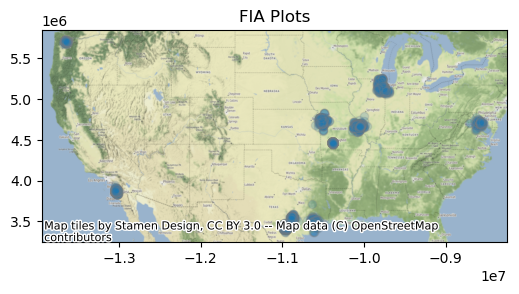

In [6]:
fig, ax = plt.subplots(figsize=(6, 6))
plt.title("FIA Plots")

trees = plotsG_WM.plot(ax = ax, kind = 'geo', edgecolor = "grey",alpha = .2)
cx.add_basemap(trees)

In [7]:
#Read Tree Data
trees = pd.read_csv("./FIAData/ID_TREE.csv")
trees.head()

,PLOTID,VISIT_NBR,STATECD,UNITCD,COUNTYCD,RETIRED_PLOT,SUBP,CONDID,TREE,STEM,...,BG_CARBON,CN,PLT_CN,SBP_CN,CND_CN,MTRE_CN,PREV_PLT_CN,PREV_TRE_CN,TREE_SITE_INDEX,AG_BIOMASS
0,1114703,1,48,5,453,180,1,1,6,6,...,12.296426,142373,251083040489998,142359,142358,4.889150e+14,NaN,NaN,NaN,123.197143
1,1114743,1,48,5,453,220,1,1,1,1,...,74.776770,142483,251083044489998,142472,142470,4.889150e+14,NaN,NaN,NaN,777.894163
2,1114770,1,48,5,453,247,1,3,1,0,...,13.153490,142521,251083045489998,142506,142505,NaN,NaN,NaN,NaN,114.551188
3,1114670,1,48,5,453,147,13,1,18,18,...,0.188247,142282,251083037489998,142259,142255,4.889150e+14,NaN,NaN,NaN,1.227984
4,1114670,1,48,5,453,147,12,1,12,12,...,0.188247,142276,251083037489998,142258,142255,4.889150e+14,NaN,NaN,NaN,1.227984


In [8]:
#Read Census Data
countyIncome = pd.read_csv("./CensusData/CountyIncome.txt")
countyIncome.head()

,GISJOIN,YEAR,STUSAB,REGIONA,DIVISIONA,STATE,STATEA,COUNTY,COUNTYA,COUSUBA,...,SDUNIA,PCI,PUMAA,GEOID,BTTRA,BTBGA,NAME_E,AMTCE001,NAME_M,AMTCM001
0,G0100010,2016-2020,AL,NaN,NaN,Alabama,1,Autauga County,1,NaN,...,NaN,NaN,NaN,05000US01001,NaN,NaN,"Autauga County, Alabama",29804,"Autauga County, Alabama",1986
1,G0100030,2016-2020,AL,NaN,NaN,Alabama,1,Baldwin County,3,NaN,...,NaN,NaN,NaN,05000US01003,NaN,NaN,"Baldwin County, Alabama",33751,"Baldwin County, Alabama",944
2,G0100050,2016-2020,AL,NaN,NaN,Alabama,1,Barbour County,5,NaN,...,NaN,NaN,NaN,05000US01005,NaN,NaN,"Barbour County, Alabama",20074,"Barbour County, Alabama",1603
3,G0100070,2016-2020,AL,NaN,NaN,Alabama,1,Bibb County,7,NaN,...,NaN,NaN,NaN,05000US01007,NaN,NaN,"Bibb County, Alabama",22626,"Bibb County, Alabama",1785
4,G0100090,2016-2020,AL,NaN,NaN,Alabama,1,Blount County,9,NaN,...,NaN,NaN,NaN,05000US01009,NaN,NaN,"Blount County, Alabama",25457,"Blount County, Alabama",1387


In [9]:
#Find total biomass of trees by county
avgLen = trees.groupby("PLOTID")['TOTAL_LENGTH'].mean()
avgLen

PLOTID
1038641    71.600000
1038933    39.000000
1038953    44.888889
1038961    90.000000
1039057    54.448276
             ...    
2999955    70.000000
3002428    30.250000
3003713    73.184211
3003719    96.000000
3005088    52.000000
Name: TOTAL_LENGTH, Length: 1657, dtype: float64

In [10]:
#Merge plot and tree data
plotLen = pd.merge(plots,avgLen,on='PLOTID')
plotLen.head()

,PLOTID,VISIT_NBR,STATECD,UNITCD,COUNTYCD,RETIRED_PLOT,INTENSITY,MEAS_YEAR,MEAS_MONTH,MEAS_DAY,...,MANUAL_REGIONAL,LAT,LON,ROAD_DIST_CD,WATER_CD,SUBP_EXAMINE_CD,CN,PREV_PLT_CN,geometry,TOTAL_LENGTH
0,1114803,1,48,5,453,280,2,2014,6,24,...,6.0.1,30.294066,-97.909314,NaN,NaN,1,251082970489998,NaN,POINT (-97.90931 30.29407),17.542857
1,1114751,1,48,5,453,228,2,2014,5,21,...,6.0.1,30.351815,-97.729351,NaN,NaN,1,251082980489998,NaN,POINT (-97.72935 30.35181),19.400000
2,1114751,3,48,5,453,228,2,2019,5,30,...,8.0,30.351815,-97.729351,NaN,NaN,1,505184001126144,NaN,POINT (-97.72935 30.35181),19.400000
3,1114730,1,48,5,453,207,3,2014,7,21,...,6.0.1,30.159883,-97.756332,NaN,NaN,1,251083021489998,NaN,POINT (-97.75633 30.15988),24.490566
4,1114837,1,48,5,453,314,4,2014,7,9,...,6.0.1,30.180511,-97.847910,NaN,NaN,1,251083039489998,NaN,POINT (-97.84791 30.18051),26.000000


In [11]:
#New Qualifier
plotLen['CountSt'] = plotLen['COUNTYCD'] * 100 + plotLen['STATECD']
countyIncome['CountSt'] = countyIncome['COUNTYA'] * 100 + countyIncome['STATEA']
countyIncome.head()

,GISJOIN,YEAR,STUSAB,REGIONA,DIVISIONA,STATE,STATEA,COUNTY,COUNTYA,COUSUBA,...,PCI,PUMAA,GEOID,BTTRA,BTBGA,NAME_E,AMTCE001,NAME_M,AMTCM001,CountSt
0,G0100010,2016-2020,AL,NaN,NaN,Alabama,1,Autauga County,1,NaN,...,NaN,NaN,05000US01001,NaN,NaN,"Autauga County, Alabama",29804,"Autauga County, Alabama",1986,101
1,G0100030,2016-2020,AL,NaN,NaN,Alabama,1,Baldwin County,3,NaN,...,NaN,NaN,05000US01003,NaN,NaN,"Baldwin County, Alabama",33751,"Baldwin County, Alabama",944,301
2,G0100050,2016-2020,AL,NaN,NaN,Alabama,1,Barbour County,5,NaN,...,NaN,NaN,05000US01005,NaN,NaN,"Barbour County, Alabama",20074,"Barbour County, Alabama",1603,501
3,G0100070,2016-2020,AL,NaN,NaN,Alabama,1,Bibb County,7,NaN,...,NaN,NaN,05000US01007,NaN,NaN,"Bibb County, Alabama",22626,"Bibb County, Alabama",1785,701
4,G0100090,2016-2020,AL,NaN,NaN,Alabama,1,Blount County,9,NaN,...,NaN,NaN,05000US01009,NaN,NaN,"Blount County, Alabama",25457,"Blount County, Alabama",1387,901


In [12]:
#Find total biomass of trees by county
avgCountyLen = plotLen.groupby("CountSt")['TOTAL_LENGTH'].mean()
avgCountyLen


CountSt
111      44.144920
541      48.250000
924      71.600000
1153     37.000000
1329     38.166667
           ...    
33948    47.207893
45348    28.500307
49148    33.537500
49348    26.944444
51029    40.254823
Name: TOTAL_LENGTH, Length: 67, dtype: float64

In [13]:
#Merge county and biomass
CountyLen = pd.merge(countyIncome,avgCountyLen,on='CountSt')
CountyLen.head()

,GISJOIN,YEAR,STUSAB,REGIONA,DIVISIONA,STATE,STATEA,COUNTY,COUNTYA,COUSUBA,...,PUMAA,GEOID,BTTRA,BTBGA,NAME_E,AMTCE001,NAME_M,AMTCM001,CountSt,TOTAL_LENGTH
0,G0600730,2016-2020,CA,NaN,NaN,California,6,San Diego County,73,NaN,...,NaN,05000US06073,NaN,NaN,"San Diego County, California",39737,"San Diego County, California",356,7306,28.925022
1,G1100010,2016-2020,DC,NaN,NaN,District of Columbia,11,District of Columbia,1,NaN,...,NaN,05000US11001,NaN,NaN,"District of Columbia, District of Columbia",58659,"District of Columbia, District of Columbia",827,111,44.144920
2,G1700310,2016-2020,IL,NaN,NaN,Illinois,17,Cook County,31,NaN,...,NaN,05000US17031,NaN,NaN,"Cook County, Illinois",39239,"Cook County, Illinois",273,3117,41.391032
3,G1700430,2016-2020,IL,NaN,NaN,Illinois,17,DuPage County,43,NaN,...,NaN,05000US17043,NaN,NaN,"DuPage County, Illinois",47501,"DuPage County, Illinois",447,4317,39.006113
4,G1700890,2016-2020,IL,NaN,NaN,Illinois,17,Kane County,89,NaN,...,NaN,05000US17089,NaN,NaN,"Kane County, Illinois",37548,"Kane County, Illinois",657,8917,35.229444


In [14]:
#CountyLen['COUNTY'].to_string()
CountyLen["STATE"].to_string()

'0               California\n1     District of Columbia\n2                 Illinois\n3                 Illinois\n4                 Illinois\n5                 Illinois\n6                 Illinois\n7                 Illinois\n8                 Illinois\n9                 Illinois\n10                Illinois\n11                Illinois\n12                 Indiana\n13                 Indiana\n14                  Kansas\n15                  Kansas\n16                  Kansas\n17                  Kansas\n18                Maryland\n19                Maryland\n20                Maryland\n21                Maryland\n22                Missouri\n23                Missouri\n24                Missouri\n25                Missouri\n26                Missouri\n27                Missouri\n28                Missouri\n29                Missouri\n30                Missouri\n31                Missouri\n32                Missouri\n33                Missouri\n34                Missouri\n35                M

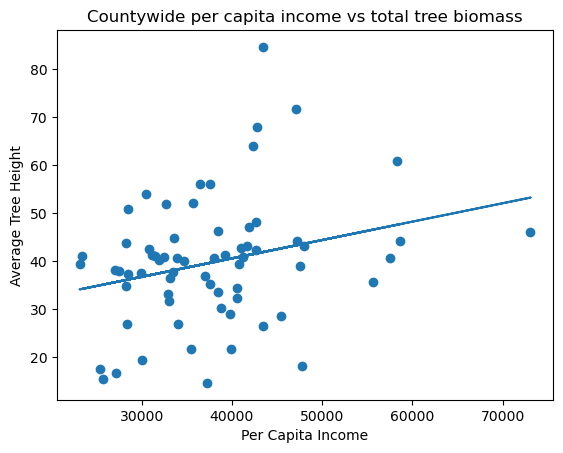

In [15]:
#Plot biomass against income
plt.scatter(CountyLen['AMTCE001'], CountyLen['TOTAL_LENGTH'])
z = np.polyfit(CountyLen['AMTCE001'], CountyLen['TOTAL_LENGTH'],1)
p = np.poly1d(z)
plt.title("Countywide per capita income vs total tree biomass")
plt.xlabel("Per Capita Income")
plt.ylabel("Average Tree Height")
plt.plot(CountyLen['AMTCE001'],p(CountyLen['AMTCE001']))
plt.show()